In [1]:
# Imports

#Numpy
import numpy as np
#Pandas
import pandas as pd
#Matplotib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Hypothesis Testing 
import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

# Load & Clean

In [2]:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2245.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.800,50.0,R


## Dropping Unnecessary Columns

In [3]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,2245.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,50.0,R


## Cleaning 'belongs_to_collection' column

In [4]:
df['belongs_to_collection'].value_counts()

{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}             16
{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/1wBfr532NOQK68wlo5ApjCmiQIB.jpg', 'backdrop_path': '/9bogrpii4e61SR6a9qLHow7I46U.jpg'}       16
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}    15
{'id': 534673, 'name': 'Madea - Collection', 'poster_path': '/bO9NvwpSElW8lp33fGyy8VaS5s9.jpg', 'backdrop_path': '/qxLbjNPrMKTgYrMhIIDzj4zgYjf.jpg'}              11
{'id': 23616, 'name': 'Naruto Collection', 'poster_path': '/q9rrfRgPUFkFqDF74jlvNYp3RpN.jpg', 'backdrop_path': '/prLI2SNNkd9wcQkFh9iWXzQtR5D.jpg'}                11
                                                                                                                                                                  ..
{'id': 946

In [5]:
# Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56488
True      3756
Name: belongs_to_collection, dtype: int64

## Cleaning/Expanding 'genres' column 

In [6]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [7]:
# Use our function on our test case
get_genre_name(df.loc[0,'genres'])

['Comedy', 'Music', 'Romance']

# HELP: is this what i want to do so i can evaluate the genres? or does it over count when the movie has multiple genres?


In [8]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df = df.explode('genres_list')
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.0,1.0,NaN,Drama


## Creating Separate Columns for 'release_date'

In [9]:
## view value_counts()
df['release_date'].value_counts()

2009-01-01    428
2010-01-01    398
2008-01-01    397
2011-01-01    315
2006-01-01    297
             ... 
2002-04-16      1
2001-09-19      1
2001-08-14      1
2011-11-14      1
2022-08-31      1
Name: release_date, Length: 7644, dtype: int64

In [10]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list,year,month,day
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy,2000.0,9.0,22.0
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music,2000.0,9.0,22.0
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.0,1.0,NaN,Drama,2000.0,4.0,14.0


In [11]:
## drop original feature
df = df.drop(columns=['release_date'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,year,month,day
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy,2000.0,9.0,22.0
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music,2000.0,9.0,22.0
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,0.0,152.0,Gang,4.0,1.0,NaN,Drama,2000.0,4.0,14.0


## Cleaning 'certification' column values

In [12]:
## Checking Certification values counts
df['certification'].value_counts(dropna=False)

NaN                                78897
R                                  13752
PG-13                               7655
NR                                  6302
PG                                  3752
G                                   1101
NC-17                                306
Unrated                                6
R                                      4
ScreamFest Horror Film Festival        2
PG-13                                  2
10                                     2
UR                                     1
Not Rated                              1
Name: certification, dtype: int64

In [13]:
# fix extra space in PG-13
df['certification'] = df['certification'].str.strip()

In [14]:
## Clean certification column values
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      78899
R        13756
PG-13     7657
NR        6312
PG        3752
G         1101
NC-17      306
Name: certification, dtype: int64

# Hypothesis Testing

## Question One: (ANOVA)
Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Hypothesis Testing Statements:
- Null Hypothesis: There is no significant difference in revenue for MPAA movie ratings.

- Alternative Hypothesis: There is a significant difference in revenue for MPAA movie ratings. 

Hypothesis Test:
- alpha = 0.05
- ANOVA test because the are more than two MPAA ratings and the revenue we are testing is numeric.
    - To see which samples hold significance, we will use; statsmodels.stats.multicomp.pairwise_tukeyhsd
- Assumptions: No Outliers, Normality and Equal Variance
    - If assumptions fail: use kruskal test; stats.kruskal()

# HELP: do i need to remove the nan values? this may be why my test is nan?

In [16]:
df = df.drop[subset = 'certification']

SyntaxError: invalid syntax (279999867.py, line 1)

In [17]:
# MPAA Ratings in 'certification' column
mpaa_ratings = df['certification'].unique()
mpaa_ratings

array([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'], dtype=object)

In [18]:
ratings = {}

## Loop through all unique categories
for certification in mpaa_ratings:
    ## Get series for group and rename
    data = df.loc[df['certification']==certification,'revenue']
    
       # save into the dictionary
    ratings[certification] = data
ratings.keys()

dict_keys([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [19]:
ratings['PG']

3        14204632.0
3        14204632.0
18       36754634.0
18       36754634.0
18       36754634.0
            ...    
60152           0.0
60152           0.0
60200        8756.0
60200        8756.0
60200        8756.0
Name: revenue, Length: 3752, dtype: float64

## No Outliers Assumption

In [20]:
cln_ratings = {}

for mpaa_ratings, ratings_data in ratings.items():
    idx_outliers = np.abs(stats.zscore(ratings_data))
    print(f'There were {idx_outliers.sum()} outliers in {mpaa_ratings}')
    
    ratings_data_cln = ratings_data[idx_outliers == False]
    
    cln_ratings[mpaa_ratings] = ratings_data_cln

There were 0.0 outliers in nan
There were 2312.242558997642 outliers in PG
There were 6478.575553212166 outliers in R
There were 578.5588435788483 outliers in G
There were 1351.596515307599 outliers in NR
There were 4178.162200969259 outliers in PG-13
There were 109.52341554548751 outliers in NC-17


## Normality Assumption

- W do not need to perform the normality test because our samples have a 15 in each.

# HELP: what am i doing wrong here with Normality loop

In [21]:
# Normality 

norm_results = [['rating', 'n', 'pval', 'sig']]

for mpaa_ratings, cert_data in cln_ratings.items():
    result = stats.normaltest(cert_data)
    norm_results.append([mpaa_ratings, len(cert_data), result.pvalue, 
                       result.pval <.05])
norm_results



ValueError: skewtest is not valid with less than 8 samples; 0 samples were given.

In [ ]:
# Normality 
## Running normal test on each group and confirming there are >20 in each group
#norm_results = {}
#for i, data in cln_ratings.items():
#    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
#    norm_results[i] = {'n': len(data),
#                             'p':p,
#                             'test stat':stat,}
## convert to a dataframe
#norm_results_df = pd.DataFrame(norm_results).T
#norm_results_df

In [ ]:
### checking sig with pandas 
#norm_results_df['sig'] = norm_results_df['p'] < .05 
#norm_results_df

## Equal Variance Assumption

In [22]:
# Equal Variance/ Lavene's Test
result = stats.levene(*cln_ratings.values())
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

LeveneResult(statistic=nan, pvalue=nan)


False

# HELP: levene test result fails to reject null hypothesis because my p- value is greater than alpha, and there is equal variance in the samples.



## Test

# HELP: why is the test result nan?

In [23]:
# ANOVA Test
result = stats.f_oneway( *cln_ratings.values())
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

F_onewayResult(statistic=nan, pvalue=nan)


False

In [24]:
# Lables for Tukey's Pairwise Multiple Comparisons Test
values = df['revenue']
labels = df['certification']

In [25]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

TypeError: '<' not supported between instances of 'str' and 'float'

# HELP: Why do i have this Error above

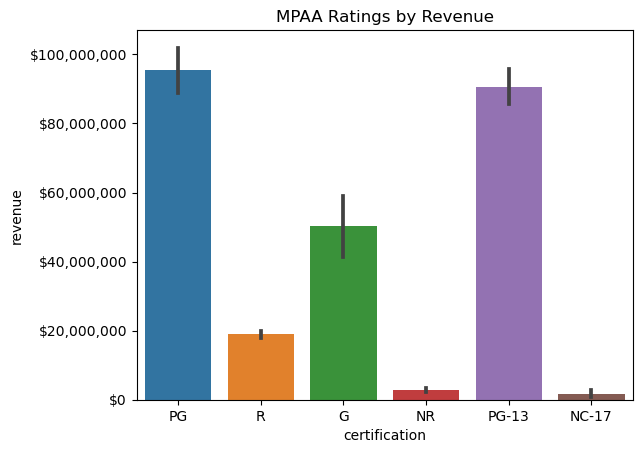

In [26]:
# Plot 
ax = sns.barplot(x=df['certification'], y = df['revenue'])
ax.set_title('MPAA Ratings by Revenue')
ax.yaxis.set_major_formatter('${x:,.0f}');

## Conclusion

Answer?

## Question Two: (Independent)
Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

Hypothesis Testing Statement:
- Null Hypothesis: There is no significant difference in revenue earned for movies that are => 2.5hrs long and those that are =<1.5hrs long.
- Alternative Hypothesis: There is a significant difference in revenue earned for movies that are => 2.5hrs long and those that are =<1.5hrs long.

Hypothesis Test:
- alpha = 0.05
- 2 Sample T-test(Independent) because we are looking at two samples and testing the earned revenue which is numeric. 
- Assumptions; No Outliers, Normality and Equal Variance
    - If Lenene's. test does not passed, we will use Welch's T-test: equal_var= False to the ttest_ind

In [36]:
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,year,month,day,over_two_half,under_one_half
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy,2000.0,9.0,22.0,False,True
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music,2000.0,9.0,22.0,False,True
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance,2000.0,9.0,22.0,False,True
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction,2000.0,11.0,15.0,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,0.0,152.0,Gang,4.0,1.0,NaN,Drama,2000.0,4.0,14.0,True,False


In [38]:
# Create columns
df['over_two_half'] = df['runtime'] >= 150.0
df['under_one_half'] = df['runtime'] <= 90.0
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,certification,genres_list,year,month,day,over_two_half,under_one_half
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy,2000.0,9.0,22.0,False,True
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music,2000.0,9.0,22.0,False,True


In [39]:
df['over_two_half'].value_counts()

False    109197
True       2586
Name: over_two_half, dtype: int64

In [40]:
df['under_one_half'].value_counts()

False    67829
True     43954
Name: under_one_half, dtype: int64

In [41]:
# Filtering movie runtimes into DFs
two_half_df = df.loc[df['over_two_half']== True, ['revenue', 'over_two_half']]
one_half_df = df.loc[df['under_one_half']== True, ['revenue', 'under_one_half']]
# Filter out feature
two_half_rev = two_half_df['revenue']
one_half_rev = one_half_df['revenue']
# check the qty in each group
display(len(two_half_rev), len(one_half_rev))

2586

43954

In [43]:
plot_df = pd.concat([two_half_df, one_half_df])
plot_df

,revenue,over_two_half,under_one_half
2,0.0,True,NaN
2,0.0,True,NaN
2,0.0,True,NaN
43,0.0,True,NaN
60,15000000.0,True,NaN
...,...,...,...
60237,0.0,NaN,True
60237,0.0,NaN,True
60242,0.0,NaN,True
60242,0.0,NaN,True


In [32]:
two_half_df

,revenue,over_two_half
2,0.0,True
2,0.0,True
2,0.0,True
43,0.0,True
60,15000000.0,True
...,...,...
60162,0.0,True
60162,0.0,True
60223,0.0,True
60223,0.0,True


### No Outliers Assumption

In [33]:
# Outliers
zscores_s = stats.zscore(two_half_rev)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

68

In [34]:
# Remove Outliers
two_half_rev_cln = two_half_rev[(np.abs(stats.zscore(two_half_rev)) < 3)]

In [ ]:
# Outliers
zscores_s = stats.zscore(one_half_rev)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

In [ ]:
# Remove Outliers
one_half_rev_cln = one_half_rev[(np.abs(stats.zscore(one_half_rev)) < 3)]

- Outliers have been removed

### Normality Assumption

In [ ]:
# Normality
result_two = stats.normaltest(two_half_rev_cln)
print(result_two)
# Is the p-value less than 0.05?
result_two.pvalue < .05

In [ ]:
# Normality
result_one = stats.normaltest(one_half_rev_cln)
print(result_one)
# Is the p-value less than 0.05?
result_one.pvalue < .05

In [ ]:
display(len(one_half_rev_cln), len(two_half_rev_cln))

- The samples distribution is not normal as our p-value is less than alpha, so we reject the null hypothesis.
- Since we have more than 20 in each sample we will continue with our last assumption.

### Equal Variance Assumption

In [ ]:
# Equal Variance
result = stats.levene(one_half_rev_cln, two_half_rev_cln)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

- P-value is less than alpha which indicates we do not have Equal Variance in our samples. Therefore, we reject the null hypothesis and we can proceed by using the Welch's T-Test.

### Test

In [ ]:
# Welch's T-test
# Independent t-test with equal_var set to False

result = stats.ttest_ind(one_half_rev_cln, two_half_rev_cln, equal_var = False)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

# HELP: dont know how i can plot  my samples

In [ ]:
plot_df = pd.concat([has_discount, no_discount])

In [ ]:
sns.barplot(data=plot_df, y='Quantity', x='has_discount', palette = "muted", alpha=.7);

In [ ]:
# Plot 
ax = sns.barplot(x= , y = df['revenue'])
ax.set_title('Runtime by Revenue')
ax.yaxis.set_major_formatter('${x:,.0f}');

### Conclusion

- Welch's T-Test gave the p-value of less than alpha, therefore we reject the null hypothesis and support the alternative hypothesis.
- There is a significant difference of revenue for movies with a runtime of >=2.5 hours and <=1.5 hours.
- With our plot we can see the there is a greater earned revenue with movies....

## Question Three: (ANOVA)
Do some movie genres earn more revenue than others?

Hypothesis Testing Statements:

- Null Hypothesis: Movie genres do not have a significant difference in revenue earned.

- Alternative Hypothesis: There is a significant difference in revenue earned for movie genres.

Hypothesis Test:

- alpha = 0.05
- ANOVA test because the are more than two genres and the revenue we are testing is numeric.
    - To see which samples hold significance, we will use; statsmodels.stats.multicomp.pairwise_tukeyhsd
- Assumptions: No Outliers, Normality and Equal Variance
    - If assumptions fail: use kruskal test; stats.kruskal()

In [ ]:
df.head(2)

In [ ]:
each_genre= df['genres_list'].unique()
each_genre

In [ ]:
genres_groups = {}

## Loop through all unique categories
for genres in each_genre:
    ## Get series for group and rename
    data = df.loc[df['genres_list']==genres,'revenue']
    
       # save into the dictionary
    genres_groups[genres] = data
genres_groups.keys()

### No Outliers Assumption

In [ ]:
# Outliers

cln_genres = {}

for each_genre, genre_data in genres_groups.items():
    idx_outliers = np.abs(stats.zscore(genre_data))
    print(f'There were {idx_outliers.sum():.2f} outliers in {each_genre}')
    
    genre_data_cln = genre_data[idx_outliers == False]
    
    cln_genres[each_genre] = genre_data_cln

### Normality Assumption

In [ ]:
# Normality 

norm_results = [['rating', 'n', 'pval', 'sig']]

for each_genre, genre_data in cln_genres.items():
    result = stats.normaltest(genre_data)
    norm_results.append([each_genre, len(genre_data), result.pvalue, 
                       result.pval <.05])
norm_results



In [ ]:
# normality 
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in cln_genres.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

In [ ]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

### Equal Variance Assumption

In [ ]:
# Equal Variance
result =stats.levene(*cln_genres.values())
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

### Test

In [ ]:
# non- Parametric test, no longer the ANOVA test because equal variance test did not pass.
result = stats.kruskal(*cln_genres.values())

# HELP/question: is the plot the only way to determine the variance or is there a tukey muliple comparison for kruskal?

In [ ]:
# ANOVA Test
result = stats.f_oneway( *cln_genres.values())
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

In [ ]:
# Lables for Tukey's Pairwise Multiple Comparisons Test
values = df['revenue']
labels = df['genres_list']

In [ ]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

In [ ]:
# Plot 
ax = sns.barplot(x=df['genres_list'], y = df['revenue'])
ax.set_title('Movie Genres by Renvenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);
ax.yaxis.set_major_formatter('${x:,.0f}');

### Conclusion

Answer: 